In [2]:

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy.stats import zscore
import numpy as np


In [3]:

# Load the dataset
data = pd.read_csv('/home/corolo/Desktop/analysisAvito/data/appartements_data.csv')

# Display the first few rows to understand the data structure
data.head()


,title,price,location,type_de_vente,salon,chamber,toilete,area,link
0,Appartement location de vacances à Meknès,300 DH /Nuit,Meknès,NaN,NaN,NaN,NaN,NaN,https://www.avito.ma/fr/autre_secteur/location...
1,appartement à louer,2 400 DH,Casablanca,NaN,1.0,NaN,NaN,50.0,https://www.avito.ma/fr/al_qods/appartements/a...
2,Appartement beru à louer 150 m² à Temara,6 500 DH,Temara,NaN,1.0,NaN,NaN,150.0,https://www.avito.ma/fr/autre_secteur/appartem...
3,Appartement près a casanearshor sidi maarouf,3 000 DH,Casablanca,NaN,1.0,NaN,NaN,56.0,https://www.avito.ma/fr/sidi_maarouf/apparteme...
4,Appartement 84 m²Al Baraka à Dcheïra El Jihadia,701 720 DH,Dcheïra El Jihadia,"Appartements, à vendre",1.0,3.0,2.0,84.0,https://www.avito.ma/fr/dche%C3%AFra_el_jihadi...


In [4]:

# Create a data catalog to summarize each column in the dataset with details
data_catalog = pd.DataFrame({
    "Column": data.columns,
    "Data Type": data.dtypes.values,
    "Non-Null Count": data.notnull().sum().values,
    "Null Count": data.isnull().sum().values,
    "Description": [
        "Title of the listing.",
        "Price of the property, including 'DH' or other units.",
        "Geographic location of the property.",
        "Type of sale (rental or sale).",
        "Number of living rooms in the property.",
        "Number of bedrooms in the property.",
        "Number of bathrooms in the property.",
        "Area of the property in square meters.",
        "Link to the listing."
    ]
})

# Display the data catalog for review
data_catalog


,Column,Data Type,Non-Null Count,Null Count,Description
0,title,object,1062,1,Title of the listing.
1,price,object,930,133,"Price of the property, including 'DH' or other..."
2,location,object,1062,1,Geographic location of the property.
3,type_de_vente,object,386,677,Type of sale (rental or sale).
4,salon,float64,640,423,Number of living rooms in the property.
5,chamber,float64,339,724,Number of bedrooms in the property.
6,toilete,float64,336,727,Number of bathrooms in the property.
7,area,float64,693,370,Area of the property in square meters.
8,link,object,1063,0,Link to the listing.


In [5]:

# Create a data catalog to summarize columns, data types, and missing values
catalog = pd.DataFrame({
    "Data Type": data.dtypes,
    "Non-Null Count": data.notnull().sum(),
    "Missing Values (%)": (data.isnull().sum() / len(data)) * 100
})
catalog


,Data Type,Non-Null Count,Missing Values (%)
title,object,1062,0.094073
price,object,930,12.511759
location,object,1062,0.094073
type_de_vente,object,386,63.687676
salon,float64,640,39.793039
chamber,float64,339,68.109125
toilete,float64,336,68.391345
area,float64,693,34.807150
link,object,1063,0.000000


/tmp/ipykernel_57214/2525399501.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


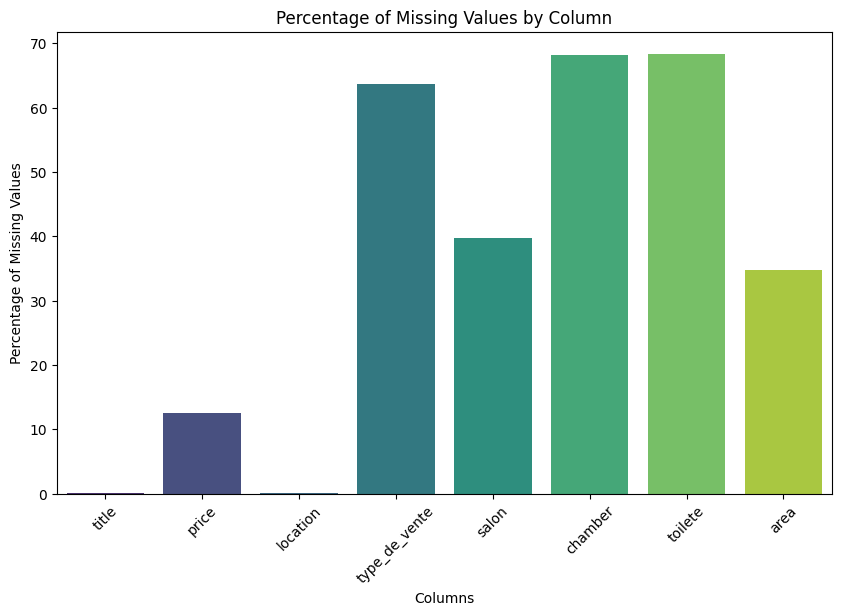

In [6]:

# Visualize missing values percentage per column
missing_values = (data.isnull().sum() / len(data)) * 100
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.title("Percentage of Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.xticks(rotation=45)
plt.show()


In [7]:

# Remove non-numeric characters in 'price' and convert to float
data['price_cleaned'] = data['price'].str.replace(r'[^\d.]', '', regex=True).astype(float)

# Display the first few entries to confirm cleaning
data[['price', 'price_cleaned']].head()


,price,price_cleaned
0,300 DH /Nuit,300.0
1,2 400 DH,2400.0
2,6 500 DH,6500.0
3,3 000 DH,3000.0
4,701 720 DH,701720.0


In [8]:

# Impute missing values in 'salon', 'chamber', 'toilete', and 'area' with median
for col in ['salon', 'chamber', 'toilete', 'area']:
    data[col].fillna(data[col].median(), inplace=True)

# Use KNN Imputer for 'price' if more precise imputation is desired
imputer = KNNImputer(n_neighbors=5)
data[['price_cleaned']] = imputer.fit_transform(data[['price_cleaned']])


/tmp/ipykernel_57214/1679324390.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
/tmp/ipykernel_57214/1679324390.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [9]:

# Define function to infer 'type_de_vente' based on keywords in 'title'
def infer_type_de_vente(title):
    title = str(title).lower()
    if any(keyword in title for keyword in ["louer", "location", "loué"]):
        return "louer"
    elif any(keyword in title for keyword in ["vendre", "vente", "à vendre"]):
        return "vendre"
    return None

# Apply the function to infer missing values in 'type_de_vente'
data['type_de_vente'] = data.apply(
    lambda row: row['type_de_vente'] if pd.notnull(row['type_de_vente']) else infer_type_de_vente(row['title']),
    axis=1
)
data['type_de_vente'].fillna("unknown", inplace=True)
data['type_de_vente'].value_counts()


/tmp/ipykernel_57214/3631369945.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['type_de_vente'].fillna("unknown", inplace=True)


type_de_vente
unknown                   394
Appartements, à vendre    386
louer                     275
vendre                      8
Name: count, dtype: int64

In [10]:

# Calculate Z-score for 'price_cleaned' to detect outliers
data['price_zscore'] = zscore(data['price_cleaned'])

# Filter out the outliers based on Z-score threshold of > 3 or < -3
price_outliers = data[(data['price_zscore'] > 3) | (data['price_zscore'] < -3)]
print("Number of Outliers in 'price_cleaned':", len(price_outliers))


Number of Outliers in 'price_cleaned': 8


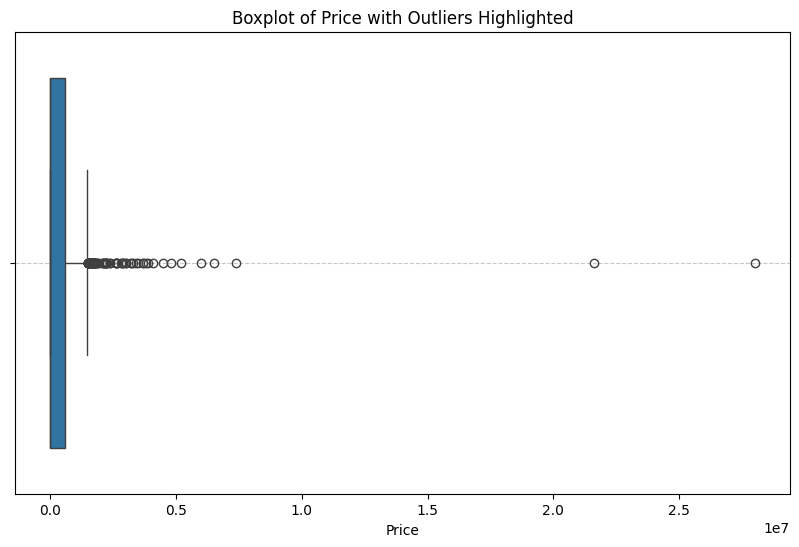

In [11]:

# Boxplot to visualize outliers in 'price_cleaned'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price_cleaned'])
plt.title("Boxplot of Price with Outliers Highlighted")
plt.xlabel("Price")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [12]:

# Calculate IQR for 'area' and detect outliers
Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)
IQR = Q3 - Q1
area_outliers = data[(data['area'] < (Q1 - 1.5 * IQR)) | (data['area'] > (Q3 + 1.5 * IQR))]
print("Number of Outliers in 'area':", len(area_outliers))


Number of Outliers in 'area': 109


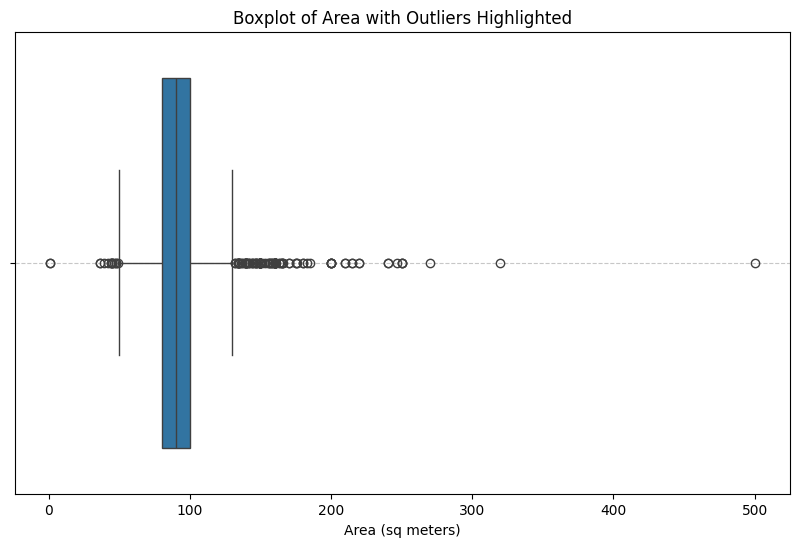

In [13]:

# Boxplot to visualize outliers in 'area'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['area'])
plt.title("Boxplot of Area with Outliers Highlighted")
plt.xlabel("Area (sq meters)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [14]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize the 'price_cleaned' and 'area' columns using StandardScaler
scaler = StandardScaler()
data[['price_standardized', 'area_standardized']] = scaler.fit_transform(data[['price_cleaned', 'area']])

# Normalize 'price_cleaned' and 'area' columns using MinMaxScaler (between 0 and 1)
minmax_scaler = MinMaxScaler()
data[['price_normalized', 'area_normalized']] = minmax_scaler.fit_transform(data[['price_cleaned', 'area']])

# Display standardized and normalized columns to confirm
data[['price_cleaned', 'price_standardized', 'price_normalized', 'area', 'area_standardized', 'area_normalized']].head()


,price_cleaned,price_standardized,price_normalized,area,area_standardized,area_normalized
0,300.0,-0.374968,0.000005,90.0,-0.144840,0.178357
1,2400.0,-0.373363,0.000080,50.0,-1.360754,0.098196
2,6500.0,-0.370229,0.000227,150.0,1.679030,0.298597
3,3000.0,-0.372904,0.000102,56.0,-1.178367,0.110220
4,701720.0,0.161227,0.025056,84.0,-0.327227,0.166333


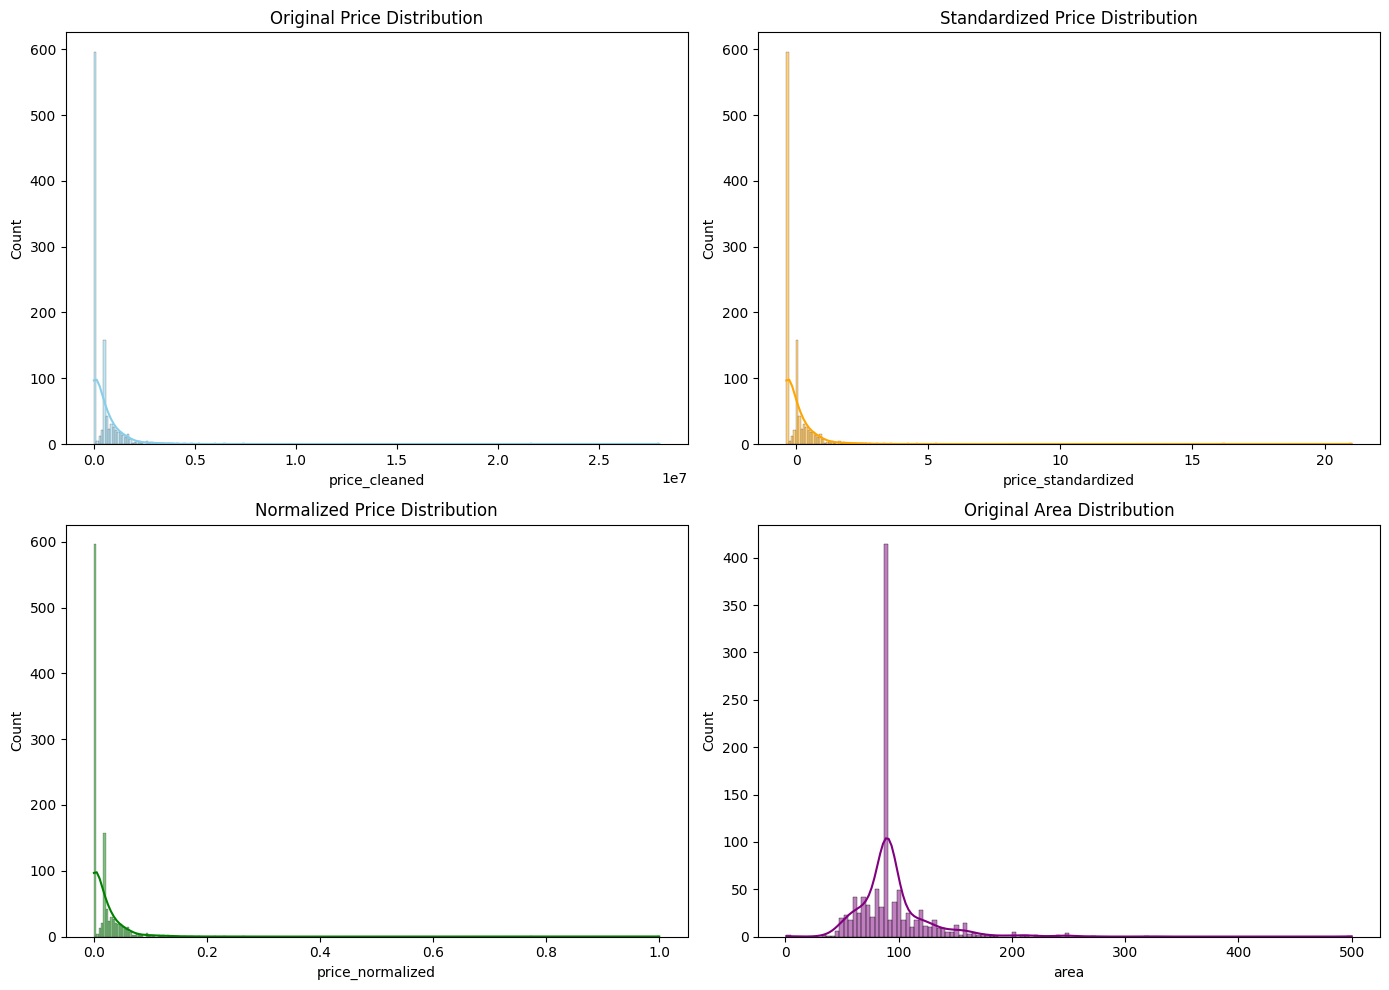

In [15]:

# Visualize distributions of standardized and normalized data
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Original 'price_cleaned' distribution
sns.histplot(data['price_cleaned'], ax=axs[0, 0], kde=True, color='skyblue')
axs[0, 0].set_title('Original Price Distribution')

# Standardized 'price_cleaned'
sns.histplot(data['price_standardized'], ax=axs[0, 1], kde=True, color='orange')
axs[0, 1].set_title('Standardized Price Distribution')

# Normalized 'price_cleaned'
sns.histplot(data['price_normalized'], ax=axs[1, 0], kde=True, color='green')
axs[1, 0].set_title('Normalized Price Distribution')

# Original 'area' distribution
sns.histplot(data['area'], ax=axs[1, 1], kde=True, color='purple')
axs[1, 1].set_title('Original Area Distribution')

plt.tight_layout()
plt.show()


In [16]:

from imblearn.over_sampling import SMOTE

# Encode the categorical target variable if necessary
data['type_de_vente_encoded'] = data['type_de_vente'].astype('category').cat.codes

# Apply SMOTE to balance the classes in 'type_de_vente_encoded'
smote = SMOTE(random_state=42)
features = data[['price_standardized', 'area_standardized', 'salon', 'chamber', 'toilete']]
target = data['type_de_vente_encoded']
features_balanced, target_balanced = smote.fit_resample(features, target)

# Display the counts of each class after SMOTE balancing
pd.Series(target_balanced).value_counts()


type_de_vente_encoded
1    394
2    394
0    394
3    394
Name: count, dtype: int64

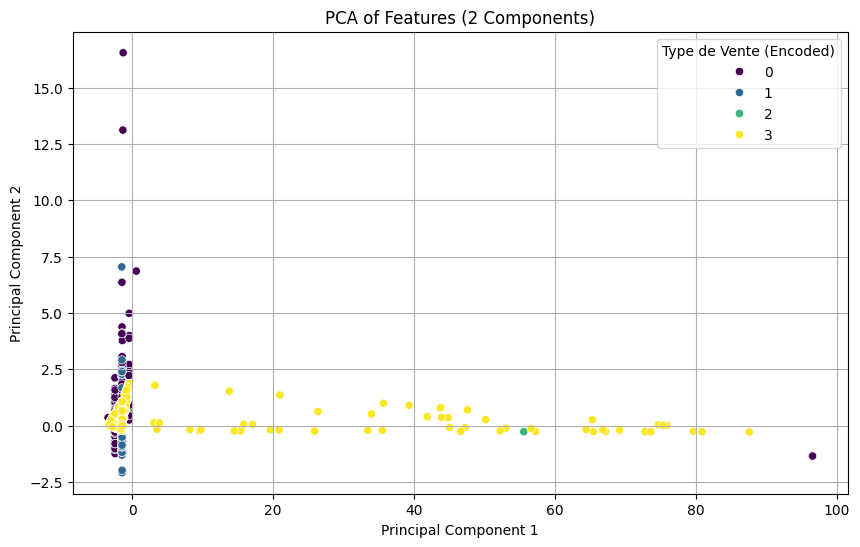

In [17]:

from sklearn.decomposition import PCA

# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_balanced)

# Create a DataFrame with PCA components for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['type_de_vente_encoded'] = target_balanced.reset_index(drop=True)

# Scatter plot of the PCA-reduced features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='type_de_vente_encoded', palette='viridis')
plt.title("PCA of Features (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Type de Vente (Encoded)')
plt.grid(True)
plt.show()
